In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
#from tensorflow.examples. tutorials.mnist import input_data
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils as np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import Callback

In [30]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
x_train = X_train.reshape(-1, 28, 28, 1)/255
x_test = X_test.reshape(-1, 28, 28, 1)/255
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
Y_train = Y_train[indices]
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


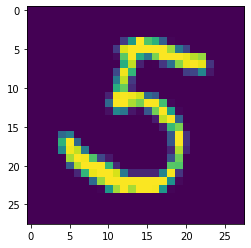

In [31]:
plt.imshow(x_train[100])
print(Y_train[100])
print(y_train[100])

In [32]:
x_val = x_train[:5000]
x_train = x_train[5000:]
y_val = y_train[:5000]
y_train = y_train[5000:]

In [76]:
model = Sequential()  
model.add(Conv2D(filters=32,  kernel_size=(3,3),  padding='same',  input_shape=(28,28,1),  activation='relu'))   
model.add(MaxPooling2D(pool_size=(2,2)))      
model.add(Flatten()) 
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  

In [77]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               1605888   
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 1,608,778
Trainable params: 1,608,778
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
train_loss = []
train_acc = []
val_loss = []
val_acc = []
test_loss =[]
test_acc = []
epochs = 300
for i in range(1,epochs):
    print("Epoch %d/%d" %(i, epochs))
    history = model.fit(x_train, y_train, epochs=1, batch_size=64, shuffle=True, validation_data=(x_val, y_val))
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    train_loss.append(history.history['loss'])
    train_acc.append(history.history['accuracy'])
    val_loss.append(history.history['val_loss'])
    val_acc.append(history.history['val_accuracy'])
    test_loss.append(loss)
    test_acc.append(acc)

Epoch 1/300
860/860 [==============================] - 13s 15ms/step - loss: 0.6586 - accuracy: 0.8321 - val_loss: 0.3317 - val_accuracy: 0.9024
Epoch 2/300
860/860 [==============================] - 13s 15ms/step - loss: 0.2771 - accuracy: 0.9197 - val_loss: 0.2631 - val_accuracy: 0.9246
Epoch 3/300
860/860 [==============================] - 12s 15ms/step - loss: 0.2232 - accuracy: 0.9344 - val_loss: 0.2042 - val_accuracy: 0.9406
Epoch 4/300
860/860 [==============================] - 13s 15ms/step - loss: 0.1868 - accuracy: 0.9448 - val_loss: 0.1757 - val_accuracy: 0.9500
Epoch 5/300
860/860 [==============================] - 13s 15ms/step - loss: 0.1608 - accuracy: 0.9521 - val_loss: 0.1561 - val_accuracy: 0.9562
Epoch 6/300
860/860 [==============================] - 13s 15ms/step - loss: 0.1418 - accuracy: 0.9586 - val_loss: 0.1477 - val_accuracy: 0.9570
Epoch 7/300
860/860 [==============================] - 13s 15ms/step - loss: 0.1266 - accuracy: 0.9633 - val_loss: 0.1352 - val_ac

860/860 [==============================] - 13s 15ms/step - loss: 0.0123 - accuracy: 0.9976 - val_loss: 0.0627 - val_accuracy: 0.9830
Epoch 58/300
860/860 [==============================] - 13s 15ms/step - loss: 0.0116 - accuracy: 0.9977 - val_loss: 0.0603 - val_accuracy: 0.9836
Epoch 59/300
860/860 [==============================] - 13s 15ms/step - loss: 0.0112 - accuracy: 0.9981 - val_loss: 0.0625 - val_accuracy: 0.9838
Epoch 60/300
860/860 [==============================] - 13s 15ms/step - loss: 0.0109 - accuracy: 0.9980 - val_loss: 0.0613 - val_accuracy: 0.9830
Epoch 61/300
860/860 [==============================] - 13s 15ms/step - loss: 0.0106 - accuracy: 0.9981 - val_loss: 0.0619 - val_accuracy: 0.9840
Epoch 62/300
860/860 [==============================] - 13s 15ms/step - loss: 0.0102 - accuracy: 0.9981 - val_loss: 0.0632 - val_accuracy: 0.9838
Epoch 63/300
860/860 [==============================] - 13s 15ms/step - loss: 0.0100 - accuracy: 0.9984 - val_loss: 0.0612 - val_accuracy

860/860 [==============================] - 13s 15ms/step - loss: 0.0025 - accuracy: 0.9998 - val_loss: 0.0667 - val_accuracy: 0.9838
Epoch 114/300
860/860 [==============================] - 13s 15ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.0666 - val_accuracy: 0.9848
Epoch 115/300
860/860 [==============================] - 13s 15ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.0677 - val_accuracy: 0.9842
Epoch 116/300
860/860 [==============================] - 13s 15ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.0662 - val_accuracy: 0.9840
Epoch 117/300
860/860 [==============================] - 13s 15ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.0687 - val_accuracy: 0.9838
Epoch 118/300
860/860 [==============================] - 13s 15ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.0678 - val_accuracy: 0.9840
Epoch 119/300
860/860 [==============================] - 13s 15ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.0685 - val_ac

Epoch 169/300
860/860 [==============================] - 13s 15ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0718 - val_accuracy: 0.9846
Epoch 170/300
860/860 [==============================] - 13s 16ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.9846
Epoch 171/300
860/860 [==============================] - 13s 15ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9838
Epoch 172/300
860/860 [==============================] - 14s 16ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0725 - val_accuracy: 0.9844
Epoch 173/300
860/860 [==============================] - 13s 16ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0716 - val_accuracy: 0.9842
Epoch 174/300
860/860 [==============================] - 13s 16ms/step - loss: 9.9953e-04 - accuracy: 1.0000 - val_loss: 0.0719 - val_accuracy: 0.9844
Epoch 175/300
860/860 [==============================] - 13s 15ms/step - loss: 9.9176e-04 - accuracy: 1.0000 - val

860/860 [==============================] - 13s 15ms/step - loss: 6.4247e-04 - accuracy: 1.0000 - val_loss: 0.0760 - val_accuracy: 0.9840
Epoch 224/300
860/860 [==============================] - 13s 15ms/step - loss: 6.3414e-04 - accuracy: 1.0000 - val_loss: 0.0755 - val_accuracy: 0.9844
Epoch 225/300
860/860 [==============================] - 13s 15ms/step - loss: 6.3780e-04 - accuracy: 1.0000 - val_loss: 0.0762 - val_accuracy: 0.9838
Epoch 226/300
860/860 [==============================] - 13s 15ms/step - loss: 6.2966e-04 - accuracy: 1.0000 - val_loss: 0.0766 - val_accuracy: 0.9842
Epoch 227/300
860/860 [==============================] - 13s 15ms/step - loss: 6.2532e-04 - accuracy: 1.0000 - val_loss: 0.0761 - val_accuracy: 0.9846
Epoch 228/300
860/860 [==============================] - 13s 15ms/step - loss: 6.2443e-04 - accuracy: 1.0000 - val_loss: 0.0759 - val_accuracy: 0.9840
Epoch 229/300
860/860 [==============================] - 13s 15ms/step - loss: 6.1515e-04 - accuracy: 1.0000

860/860 [==============================] - 13s 15ms/step - loss: 4.5378e-04 - accuracy: 1.0000 - val_loss: 0.0786 - val_accuracy: 0.9848
Epoch 278/300
860/860 [==============================] - 13s 15ms/step - loss: 4.4976e-04 - accuracy: 1.0000 - val_loss: 0.0788 - val_accuracy: 0.9844
Epoch 279/300
860/860 [==============================] - 13s 15ms/step - loss: 4.4690e-04 - accuracy: 1.0000 - val_loss: 0.0791 - val_accuracy: 0.9840
Epoch 280/300
860/860 [==============================] - 13s 15ms/step - loss: 4.4614e-04 - accuracy: 1.0000 - val_loss: 0.0790 - val_accuracy: 0.9842
Epoch 281/300
860/860 [==============================] - 13s 15ms/step - loss: 4.4319e-04 - accuracy: 1.0000 - val_loss: 0.0792 - val_accuracy: 0.9848
Epoch 282/300
860/860 [==============================] - 13s 15ms/step - loss: 4.4160e-04 - accuracy: 1.0000 - val_loss: 0.0790 - val_accuracy: 0.9844
Epoch 283/300
860/860 [==============================] - 13s 15ms/step - loss: 4.3783e-04 - accuracy: 1.0000

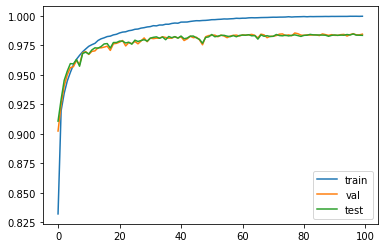

In [82]:
t = range(len(train_loss))
plt.plot(t[:100], train_acc[:100], label='train')
plt.plot(t[:100], val_acc[:100], label='val')
plt.plot(t[:100], test_acc[:100], label='test')
plt.legend()
plt.show()

In [67]:
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.loss = []
        self.acc = []

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        my_loss, my_acc = self.model.evaluate(x, y, verbose=0)
        self.loss.append(my_loss)
        self.acc.append(my_acc)
    def get_history(self):
        return (self.loss, self.acc)
mycallback = TestCallback([x_test, y_test])        
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
history= model.fit(x_train, y_train, epochs=5, batch_size=64, shuffle=True, validation_data=(x_val, y_val), callbacks=mycallback)
print(model.evaluate(x_test, y_test, verbose=0))

Epoch 1/5
860/860 [==============================] - 13s 16ms/step - loss: 0.6444 - accuracy: 0.8371 - val_loss: 0.3321 - val_accuracy: 0.9040
Epoch 2/5
860/860 [==============================] - 13s 15ms/step - loss: 0.2786 - accuracy: 0.9181 - val_loss: 0.2698 - val_accuracy: 0.9210
Epoch 3/5
860/860 [==============================] - 14s 16ms/step - loss: 0.2256 - accuracy: 0.9339 - val_loss: 0.2224 - val_accuracy: 0.9320
Epoch 4/5
860/860 [==============================] - 13s 16ms/step - loss: 0.1898 - accuracy: 0.9435 - val_loss: 0.1835 - val_accuracy: 0.9468
Epoch 5/5
860/860 [==============================] - 14s 16ms/step - loss: 0.1626 - accuracy: 0.9527 - val_loss: 0.1737 - val_accuracy: 0.9506
[0.1669602245092392, 0.95169997215271]


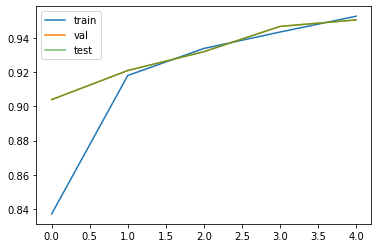

In [68]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
test_loss, test_acc = mycallback.get_history()
t = range(len(train_loss))
plt.plot(t, train_acc, label='train')
plt.plot(t, val_acc, label='val')
plt.plot(t, test_acc, label='test',alpha=0.7)
plt.legend()
plt.show()

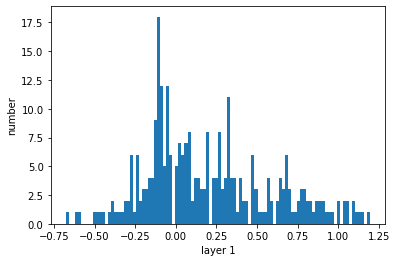

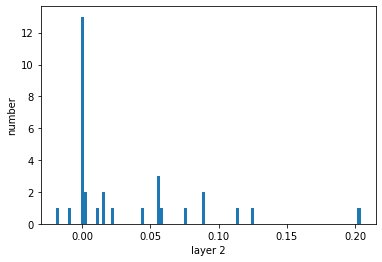

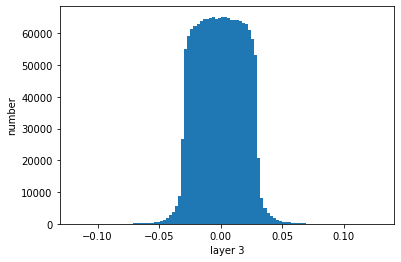

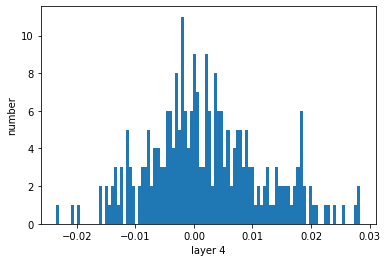

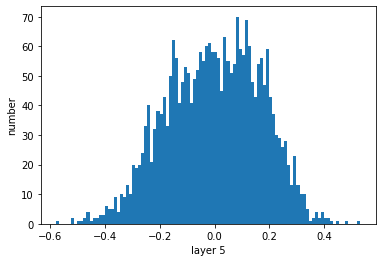

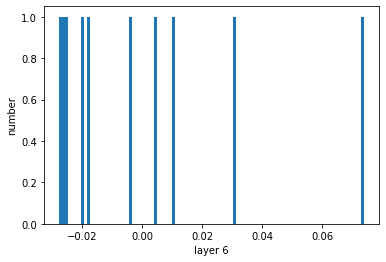

In [102]:
weights = model.get_weights()
for idx, fc in enumerate(weights):
    plt.figure()
    plt.hist(fc.flatten(), 100)
    plt.xlabel('layer ' + str(idx + 1))
    plt.ylabel('number')
plt.show()

In [89]:
for i, layer in enumerate(model.layers):
    print(layer.name)
print(len(weights))

conv2d_9
max_pooling2d_9
flatten_9
dense_18
dense_19
6
